# Лабораторна робота № 2
## Виконала Денисенко Анастасія, ФІ-21

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Зчитування зображень і переведення в RGB

In [2]:
im1 = cv2.imread("1.jpg")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread("2.jpg")
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.imread("3.jpg")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im4 = cv2.imread("4.jpg")
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)

### Відображення зображень

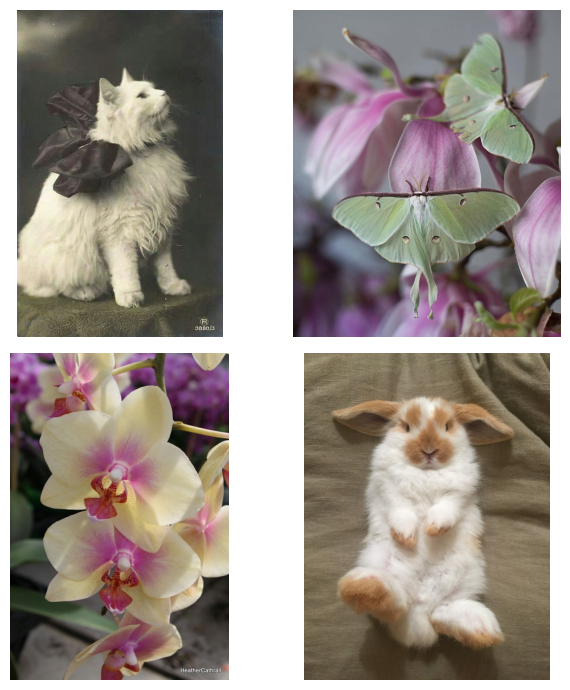

In [3]:
plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.imshow(im1)
plt.axis("off")

plt.subplot(222)
plt.imshow(im2)
plt.axis("off")

plt.subplot(223)
plt.imshow(im3)
plt.axis("off")

plt.subplot(224)
plt.imshow(im4)
plt.axis("off")

plt.tight_layout()
plt.show()

## White patch

In [4]:
def white_patch(im, percentile = 90):
    # Відсоток пікселів, що вважатимуться білими
    white = np.percentile(im, percentile, axis=(0, 1))
    # Нормалізація
    output = im / white
    # Повернення в границі
    np.clip(output, 0, 1, out=output)
    return output

## Gray world

In [5]:
def gray_world(im):
    # Відношення середнього за яскравістю пікселя на зображенні 
    # до середнього за яскравістю пікселя в каналі
    coeff = im.mean() / im.mean(axis = (0, 1))
    # Масштабування
    output = im * coeff
    # Повернення в границі
    output = np.clip(output, 0, 255)
    # Переведення в цілочисельний формат
    output = output.astype(int)
    return output

## Scale by max

In [6]:
def scale_by_max(im):
    # Знаходження найбільшого за яскравістю пікселя на зображенні 
    max_vals = im.max(axis=(0, 1))
    # Масштабування
    output = im / max_vals * 255
    # Повернення в границі
    output = np.clip(output, 0, 255)
    return output.astype(int)

### Відображення зображень з порівняннями

In [7]:
def plot_comparison(images):
    
    fig, axes = plt.subplots(4, 4, figsize=(16, 16))

    for i, im in enumerate(images):

        # Original
        axes[i, 0].imshow(im)
        axes[i, 0].set_title(f"Original {i+1}")
        axes[i, 0].axis("off")

        # White patch
        axes[i, 1].imshow(white_patch(im))
        axes[i, 1].set_title(f"White patch {i+1}")
        axes[i, 1].axis("off")

        # Gray world
        axes[i, 2].imshow(gray_world(im))
        axes[i, 2].set_title(f"Gray world {i+1}")
        axes[i, 2].axis("off")

        # Scale by max
        axes[i, 3].imshow(scale_by_max(im))
        axes[i, 3].set_title(f"Scale by max {i+1}")
        axes[i, 3].axis("off")

    fig.suptitle("Images with applied functions\n", fontsize=20)
    plt.tight_layout()
    plt.show()

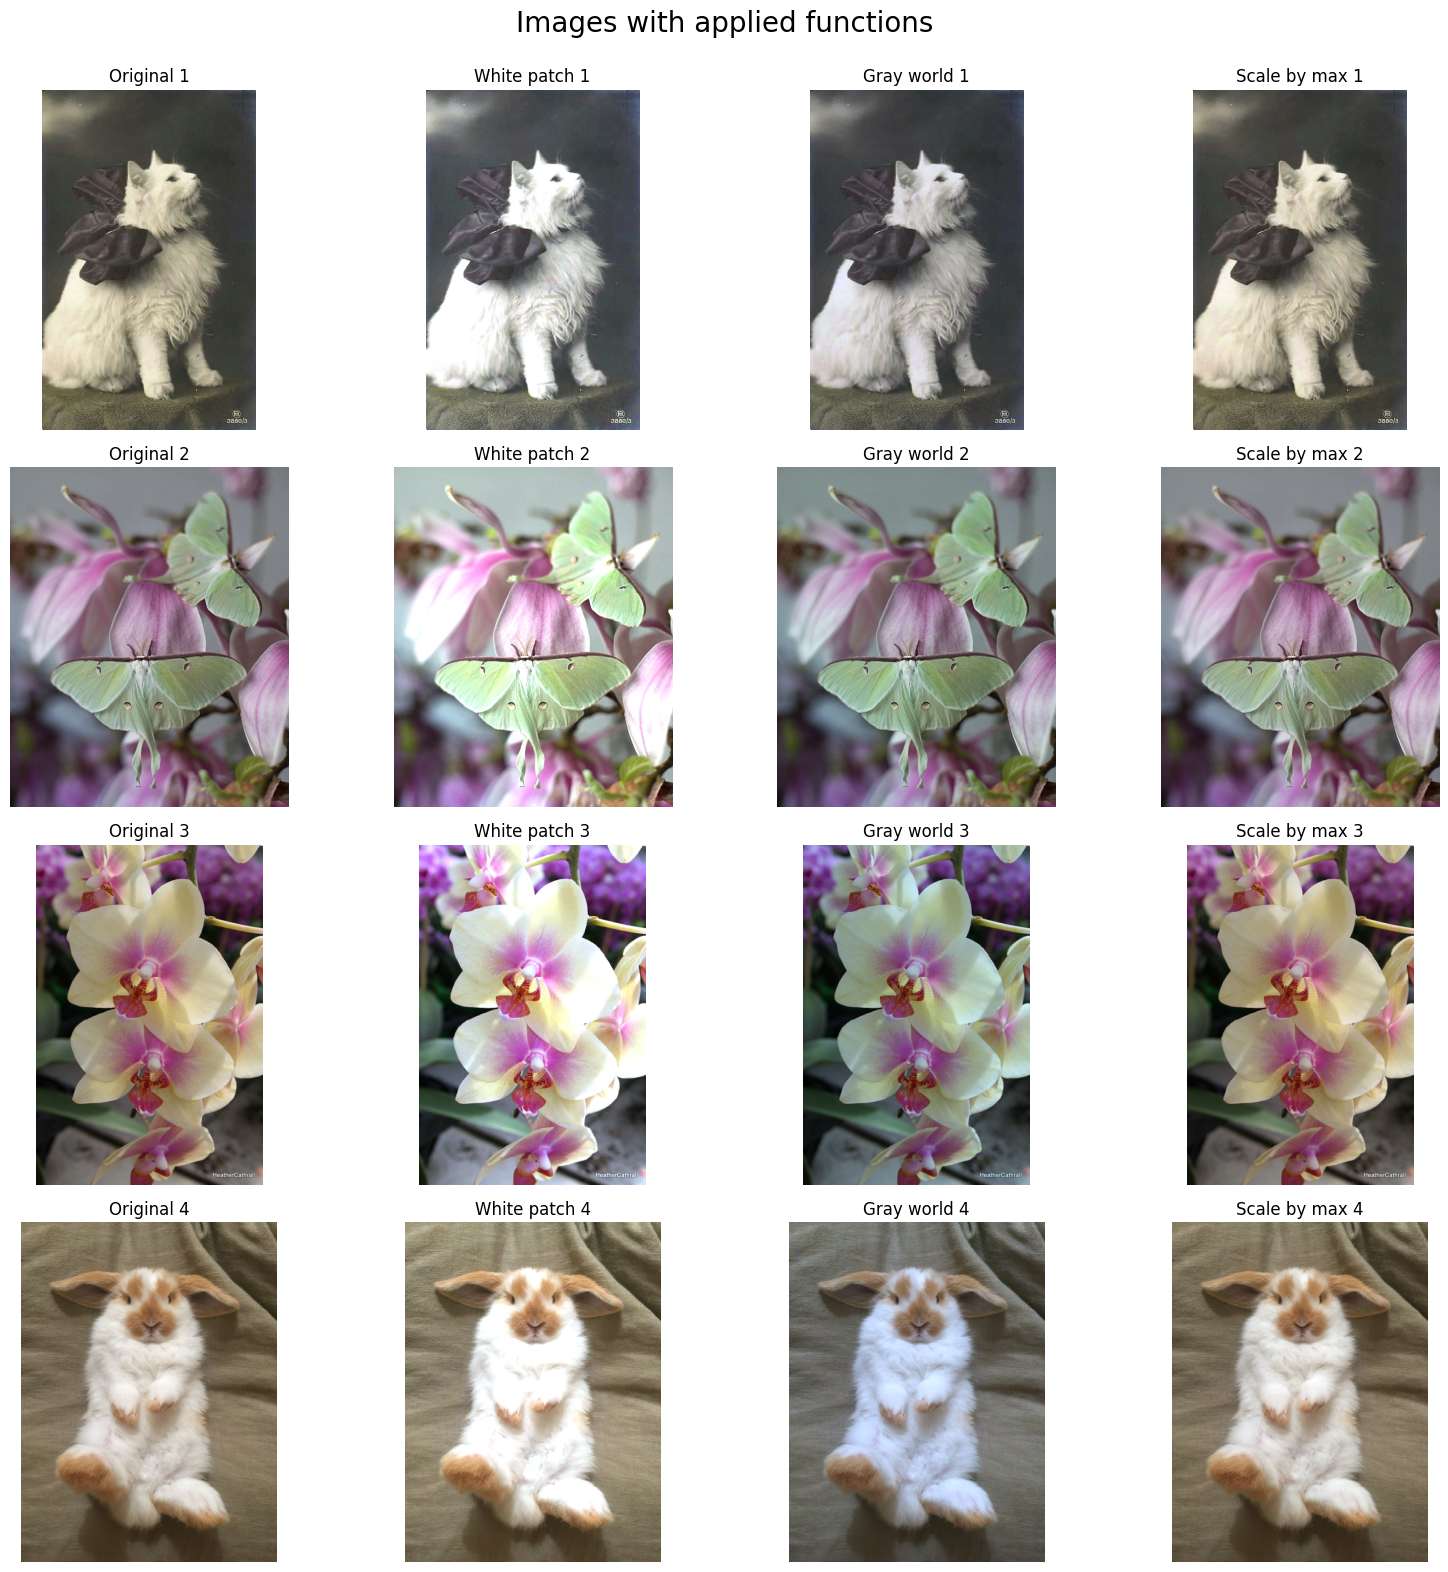

In [8]:
plot_comparison([im1, im2, im3, im4])